<a href="https://colab.research.google.com/github/SorenKyhl/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Import torch
import torch
from torch import nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

%config InlineBackend.figure_format='retina'


# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.3.0+cu121
cpu


In [2]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("utils.py").is_file():
  print("utils.py already exists, skipping download")
else:
  print("Downloading utils.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://github.com/SorenKyhl/PyTorch-Examples/blob/main/utils.py")
  with open("utils.py", "wb") as f:
    f.write(request.content)

In [3]:
!pip install torchmetrics
import torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 6.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [4]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [5]:
train_data = torchvision.datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = torchvision.datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)


# Useful for later
class_names = train_data.classes

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16265660.44it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 497487.40it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4483734.47it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7715888.52it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [102]:
def plot_some(train_data, class_names):
  plt.figure(figsize=(10,4))
  rows = 2
  cols = 5

  for i in range(rows*cols):
    plt.subplot(rows, cols,i+1)
    img, label = train_data[i]
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])

    plt.tick_params(
      axis='both',         # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      left=False,
      right=False,
      labelleft=False,
      labelbottom=False)

In [ ]:
plot_some(train_data, class_names)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
batch_size = 32
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
class TinyNN(nn.Module):
  """Dense Neural Network for MNIST classification"""
  def __init__(self,
               input_shape = 28*28,
               width = 10,
               output_shape = 10):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, width),
        nn.ReLU(),
        nn.Linear(width, width),
        nn.ReLU(),
        nn.Linear(width, output_shape)
    )

  def forward(self, x):
    return self.linear(x)

class LinearOnlyModel(nn.Module):
    """Dense Neural Network with no nonlinear activation functions for MNIST classification"""
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


class TinyVGG(nn.Module):
  """CNN architecture for MNIST classification"""
  def __init__(self,
               input_shape = 28*28,
               width = 8,
               output_shape = 10):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Conv2d(1, width, 3), # 26 x 26
        nn.ReLU(),
        nn.MaxPool2d(2), # 13x13
        nn.Conv2d(width, width, 3), # 11 x 11
        nn.ReLU(),
        nn.MaxPool2d(2), # image size 5 x 5
        nn.Flatten(),
        nn.Linear(5*5*width, output_shape)
    )

  def forward(self, x):
    return self.linear(x)

class PyTorchClassifier():
  """wrapper for a PyTorch classifier model + loss function + optimizer"""
  def __init__(self,
               model : nn.Module,
               lr : float = 1e-1,
               class_names = class_names,
               ):
    self.model = model
    self.loss_fn = nn.CrossEntropyLoss()
    self.optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
    self.accuracy_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

In [13]:
model_0 = PyTorchClassifier(LinearOnlyModel(28*28, 10, len(class_names)), class_names=class_names)
model_1 = PyTorchClassifier(TinyNN(28*28, 8, len(class_names)), class_names=class_names)
model_2 = PyTorchClassifier(TinyNN(28*28, 48, len(class_names)), class_names=class_names)
model_3 = PyTorchClassifier(TinyVGG(28*28, 8, len(class_names)), class_names=class_names)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [143]:
def train_epoch(train_dataloader,
                modelwrapper : PyTorchClassifier,
                device = device):
  """trains one epoch, prints metrics every 10% of the way."""
  model = modelwrapper.model
  loss_fn = modelwrapper.loss_fn
  optimizer = modelwrapper.optimizer

  progress = []
  losses = []
  accs = []

  model.to(device)
  for batch, (X, y) in enumerate(train_dataloader):

    if batch == 0:
      plt.imshow(X[0].squeeze(), cmap="gray")

    model.train()
    X, y = X.to(device), y.to(device)
    logits = model(X).squeeze()
    loss = loss_fn(logits, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % int(len(train_dataloader)/10) == 0:
      # do this 10x each epoch
      preds = torch.argmax(logits, dim=1)
      acc = modelwrapper.accuracy_fn(preds, y)
      progress.append(batch/len(train_dataloader))
      losses.append(loss.item())
      accs.append(acc.item())
      print(f"training loss: {loss:.3f} \t acc: {acc:.3f} \t batch: [{batch} / {len(train_dataloader)} ]")

  return progress, losses, accs

In [122]:
def test(test_dataloader,
         modelwrapper: PyTorchClassifier,
         device = device,
         return_predictions = False):
  """evaluates model on test data and returns metrics and predictions

  Args:
    test_dataloader (torch.utils.data.DataLoader): dataloader of test data
    device (str) : device to run on
    return_preds (bool): whether to return a list of all the predictions

  Returns:
    total_loss (list) : list of total losses
    total_acc (list) : list of total accuracies
    preds (optional, list) : list of predictions. only returned if return_preds is True
  """

  model = modelwrapper.model
  loss_fn = modelwrapper.loss_fn

  n_batches = len(test_dataloader)

  if return_predictions:
    predictions = np.array([])

  model.to(device)
  model.eval()
  with torch.inference_mode():
    total_loss = 0
    total_acc = 0

    for batch, (X, y) in enumerate(test_dataloader):

      # debug
      if batch == 0:
        plt.imshow(X[0].squeeze(), cmap="gray")


      X, y = X.to(device), y.to(device)
      logits = model(X).squeeze()
      total_loss += loss_fn(logits, y)
      batch_preds = torch.argmax(logits, dim=1)
      total_acc += modelwrapper.accuracy_fn(batch_preds, y)

      if return_predictions:
        predictions = np.hstack((preds, batch_preds.cpu().numpy()))

    total_loss /= n_batches
    total_acc /= n_batches

    print(f"Model Name: {model.__class__.__name__}")
    print(f"test loss: {total_loss:.3f} \t test acc: {total_acc:.3f}")

  if return_predictions:
    return total_loss, total_acc, predictions
  else:
    return total_loss, total_acc

In [123]:
def train(modelwrapper: PyTorchClassifier,
          n_epochs,
          train_dataloader = train_dataloader,
          test_dataloader = test_dataloader,
          device = device
          ):
  """full training loop"""

  epochs = []
  losses = []
  accs = []

  for epoch in tqdm(range(n_epochs)):
    progress, loss, acc = train_epoch(train_dataloader, modelwrapper, device = device)

    epochs = np.hstack((epochs, np.array(progress)+epoch))
    losses = np.hstack((losses, loss))
    accs = np.hstack((accs, acc))

    if epoch % 1 == 0:
      print(f"----- Epoch: {epoch} -----")
      loss, acc = test(test_dataloader, modelwrapper, device = device)

  return epochs, losses, accs

In [21]:
epochs0, losses0, accs0 = train(model_0, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 0.117 	 acc: 0.969 	 batch: [0 / 1875 ]
training loss: 0.048 	 acc: 1.000 	 batch: [187 / 1875 ]
training loss: 0.192 	 acc: 0.938 	 batch: [374 / 1875 ]
training loss: 0.306 	 acc: 0.938 	 batch: [561 / 1875 ]
training loss: 0.636 	 acc: 0.938 	 batch: [748 / 1875 ]
training loss: 0.504 	 acc: 0.844 	 batch: [935 / 1875 ]
training loss: 0.303 	 acc: 0.906 	 batch: [1122 / 1875 ]
training loss: 0.264 	 acc: 0.906 	 batch: [1309 / 1875 ]
training loss: 0.138 	 acc: 0.969 	 batch: [1496 / 1875 ]
training loss: 0.359 	 acc: 0.938 	 batch: [1683 / 1875 ]
training loss: 0.017 	 acc: 1.000 	 batch: [1870 / 1875 ]
----- Epoch: 0 -----
Model Name: LinearOnlyModel
test loss: 0.312 	 test acc: 0.909
training loss: 0.164 	 acc: 0.969 	 batch: [0 / 1875 ]
training loss: 0.048 	 acc: 1.000 	 batch: [187 / 1875 ]
training loss: 0.180 	 acc: 0.938 	 batch: [374 / 1875 ]
training loss: 0.307 	 acc: 0.938 	 batch: [561 / 1875 ]
training loss: 0.651 	 acc: 0.938 	 batch: [748 / 1875 ]
tra

In [22]:
epochs1, losses1, accs1 = train(model_1, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 2.335 	 acc: 0.156 	 batch: [0 / 1875 ]
training loss: 0.959 	 acc: 0.688 	 batch: [187 / 1875 ]
training loss: 0.674 	 acc: 0.812 	 batch: [374 / 1875 ]
training loss: 0.296 	 acc: 0.906 	 batch: [561 / 1875 ]
training loss: 0.694 	 acc: 0.844 	 batch: [748 / 1875 ]
training loss: 0.665 	 acc: 0.812 	 batch: [935 / 1875 ]
training loss: 0.410 	 acc: 0.906 	 batch: [1122 / 1875 ]
training loss: 0.410 	 acc: 0.875 	 batch: [1309 / 1875 ]
training loss: 0.310 	 acc: 0.906 	 batch: [1496 / 1875 ]
training loss: 0.317 	 acc: 0.844 	 batch: [1683 / 1875 ]
training loss: 0.037 	 acc: 1.000 	 batch: [1870 / 1875 ]
----- Epoch: 0 -----
Model Name: TinyNN
test loss: 0.394 	 test acc: 0.881
training loss: 0.494 	 acc: 0.844 	 batch: [0 / 1875 ]
training loss: 0.134 	 acc: 0.969 	 batch: [187 / 1875 ]
training loss: 0.261 	 acc: 0.906 	 batch: [374 / 1875 ]
training loss: 0.190 	 acc: 0.906 	 batch: [561 / 1875 ]
training loss: 0.701 	 acc: 0.875 	 batch: [748 / 1875 ]
training los

In [23]:
epochs2, losses2, accs2 = train(model_2, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 2.288 	 acc: 0.219 	 batch: [0 / 1875 ]
training loss: 0.379 	 acc: 0.938 	 batch: [187 / 1875 ]
training loss: 0.317 	 acc: 0.906 	 batch: [374 / 1875 ]
training loss: 0.263 	 acc: 0.938 	 batch: [561 / 1875 ]
training loss: 0.602 	 acc: 0.875 	 batch: [748 / 1875 ]
training loss: 0.686 	 acc: 0.781 	 batch: [935 / 1875 ]
training loss: 0.216 	 acc: 0.938 	 batch: [1122 / 1875 ]
training loss: 0.193 	 acc: 0.938 	 batch: [1309 / 1875 ]
training loss: 0.108 	 acc: 0.938 	 batch: [1496 / 1875 ]
training loss: 0.275 	 acc: 0.969 	 batch: [1683 / 1875 ]
training loss: 0.006 	 acc: 1.000 	 batch: [1870 / 1875 ]
----- Epoch: 0 -----
Model Name: TinyNN
test loss: 0.183 	 test acc: 0.944
training loss: 0.135 	 acc: 0.938 	 batch: [0 / 1875 ]
training loss: 0.038 	 acc: 1.000 	 batch: [187 / 1875 ]
training loss: 0.176 	 acc: 0.938 	 batch: [374 / 1875 ]
training loss: 0.185 	 acc: 0.938 	 batch: [561 / 1875 ]
training loss: 0.509 	 acc: 0.938 	 batch: [748 / 1875 ]
training los

In [24]:
epochs3, losses3, accs3 = train(model_3, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 2.296 	 acc: 0.156 	 batch: [0 / 1875 ]
training loss: 0.105 	 acc: 1.000 	 batch: [187 / 1875 ]
training loss: 0.171 	 acc: 0.938 	 batch: [374 / 1875 ]
training loss: 0.297 	 acc: 0.938 	 batch: [561 / 1875 ]
training loss: 0.411 	 acc: 0.938 	 batch: [748 / 1875 ]
training loss: 0.166 	 acc: 0.969 	 batch: [935 / 1875 ]
training loss: 0.087 	 acc: 0.938 	 batch: [1122 / 1875 ]
training loss: 0.180 	 acc: 0.969 	 batch: [1309 / 1875 ]
training loss: 0.094 	 acc: 0.969 	 batch: [1496 / 1875 ]
training loss: 0.221 	 acc: 0.938 	 batch: [1683 / 1875 ]
training loss: 0.004 	 acc: 1.000 	 batch: [1870 / 1875 ]
----- Epoch: 0 -----
Model Name: TinyVGG
test loss: 0.124 	 test acc: 0.964
training loss: 0.058 	 acc: 1.000 	 batch: [0 / 1875 ]
training loss: 0.005 	 acc: 1.000 	 batch: [187 / 1875 ]
training loss: 0.055 	 acc: 1.000 	 batch: [374 / 1875 ]
training loss: 0.180 	 acc: 0.938 	 batch: [561 / 1875 ]
training loss: 0.260 	 acc: 0.938 	 batch: [748 / 1875 ]
training lo

In [26]:
def plot_loss_curves(epochs, losses, accs):
  plt.figure(figsize=(10,4))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accs)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")

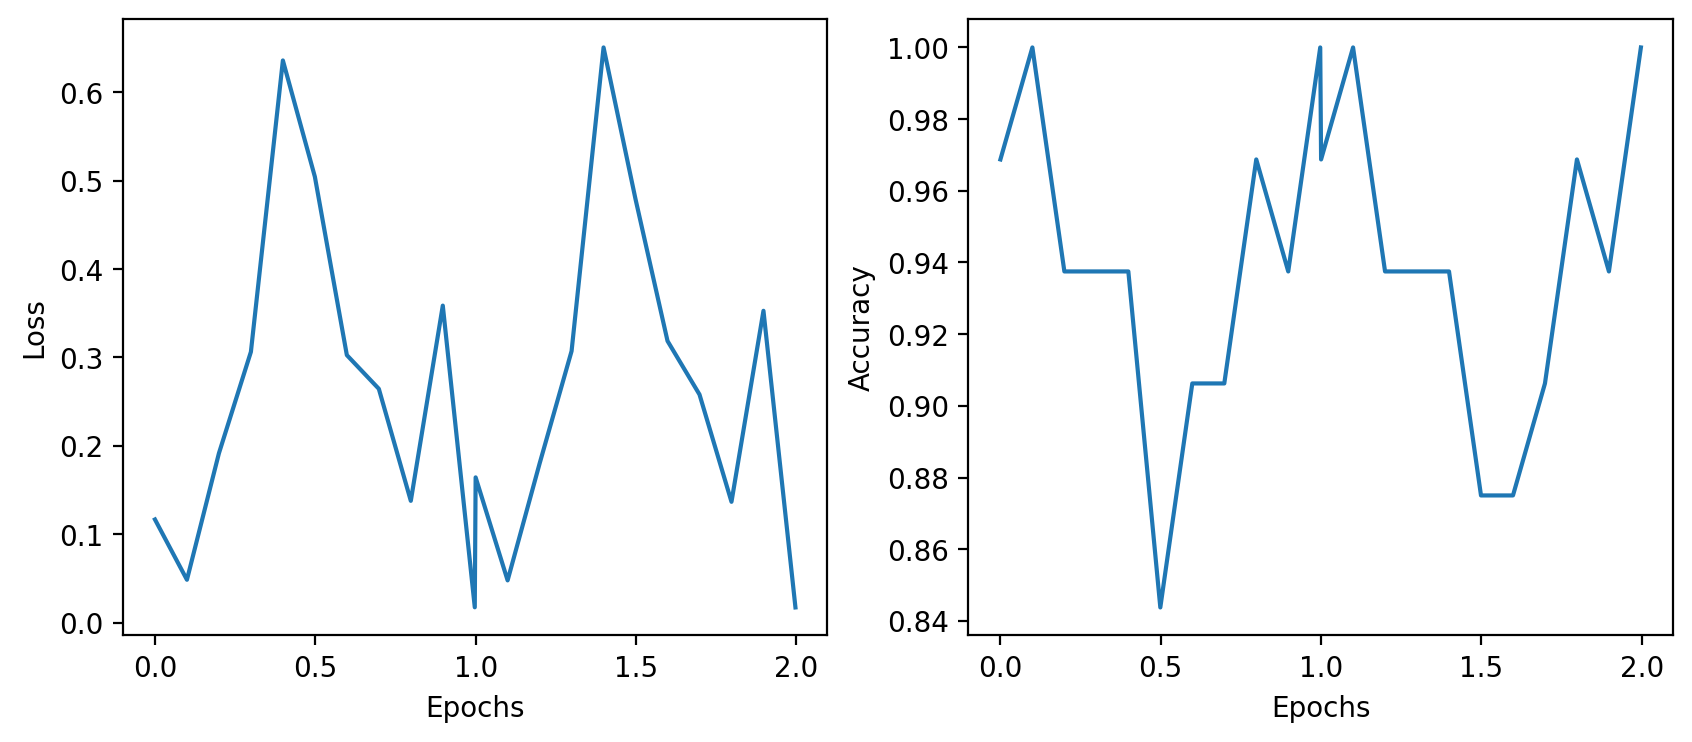

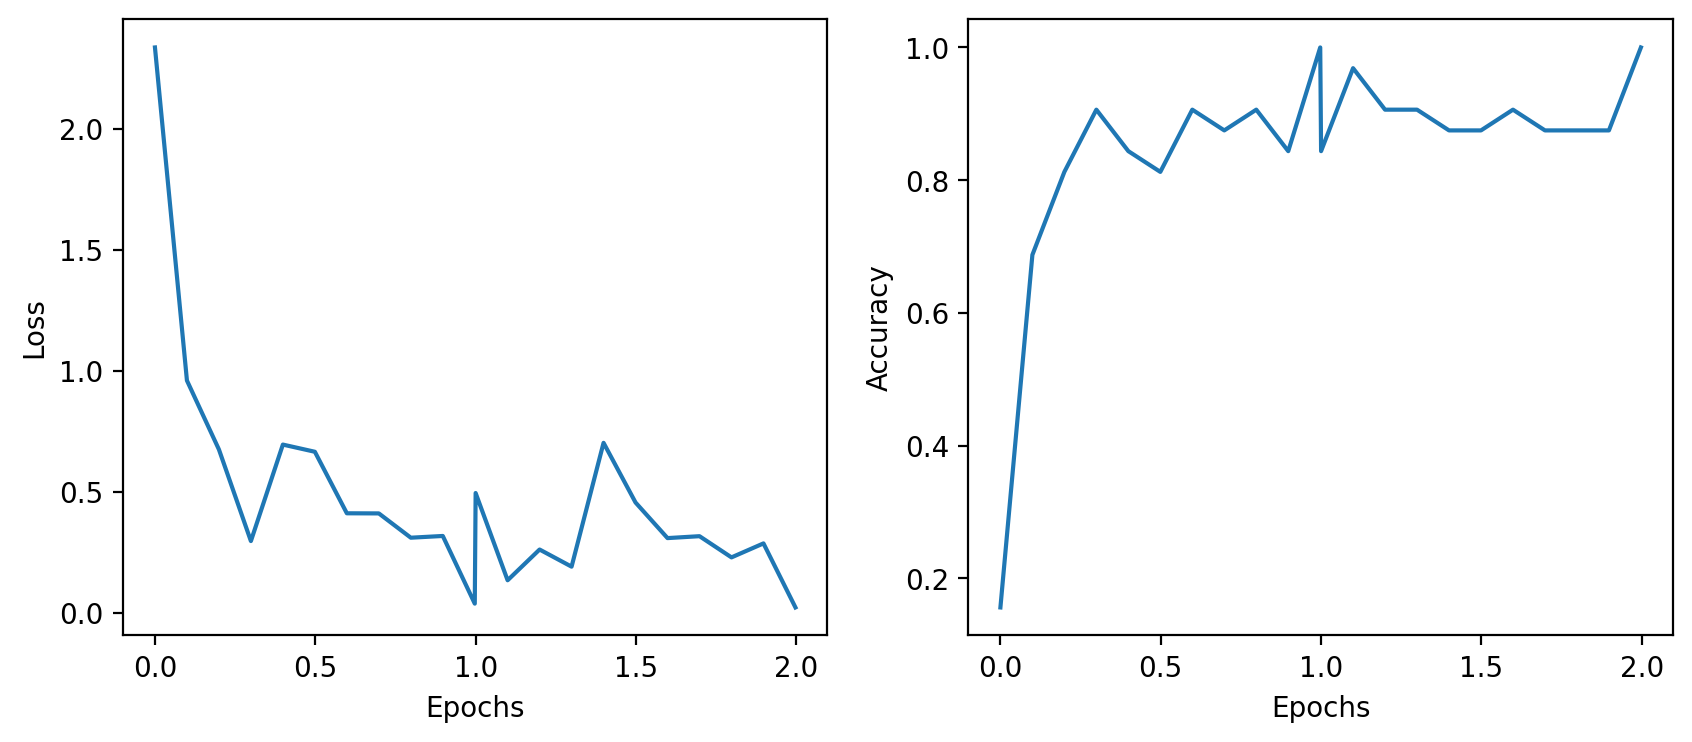

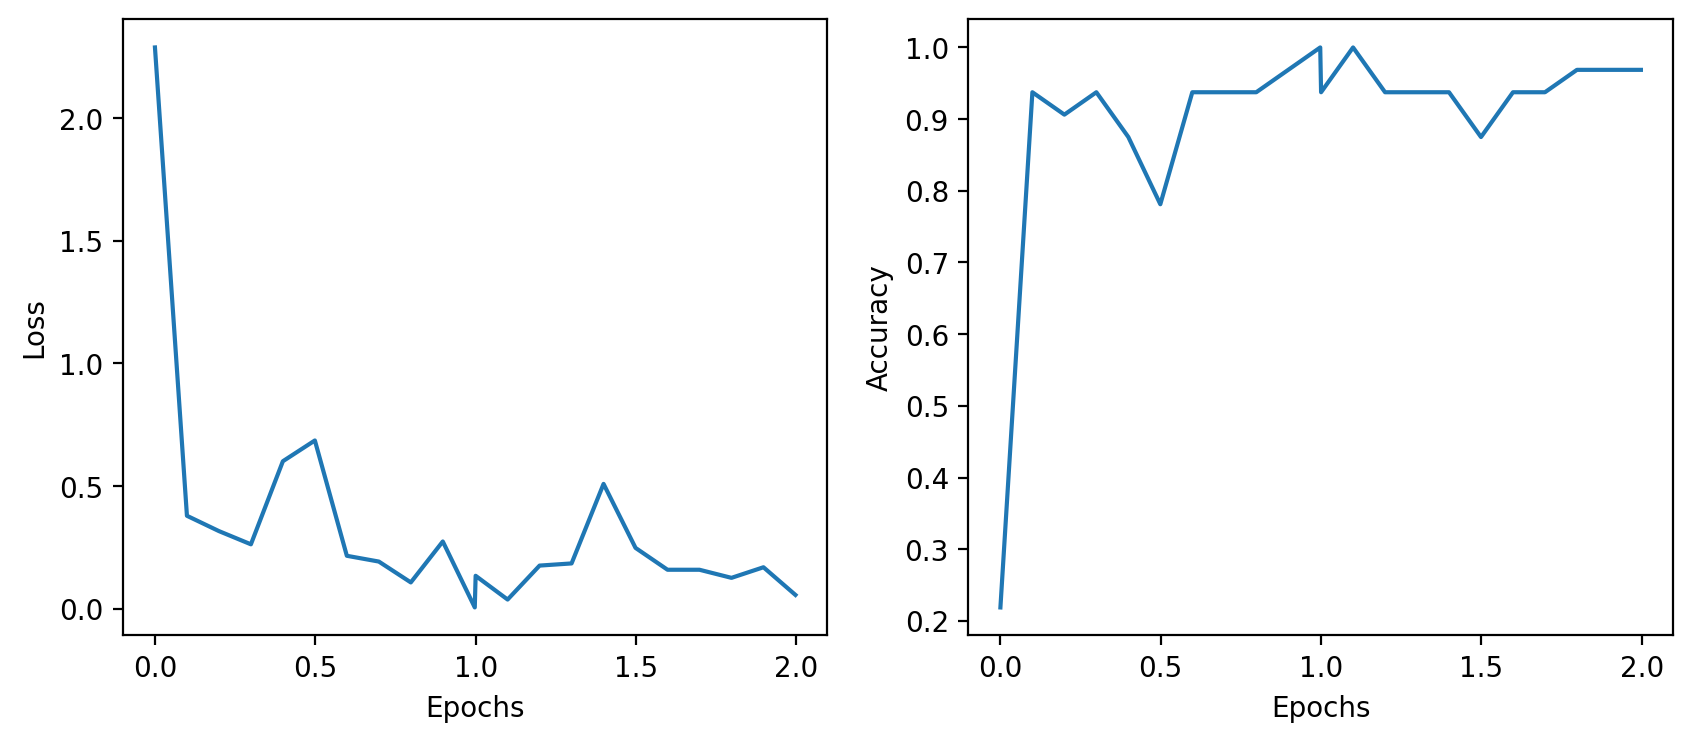

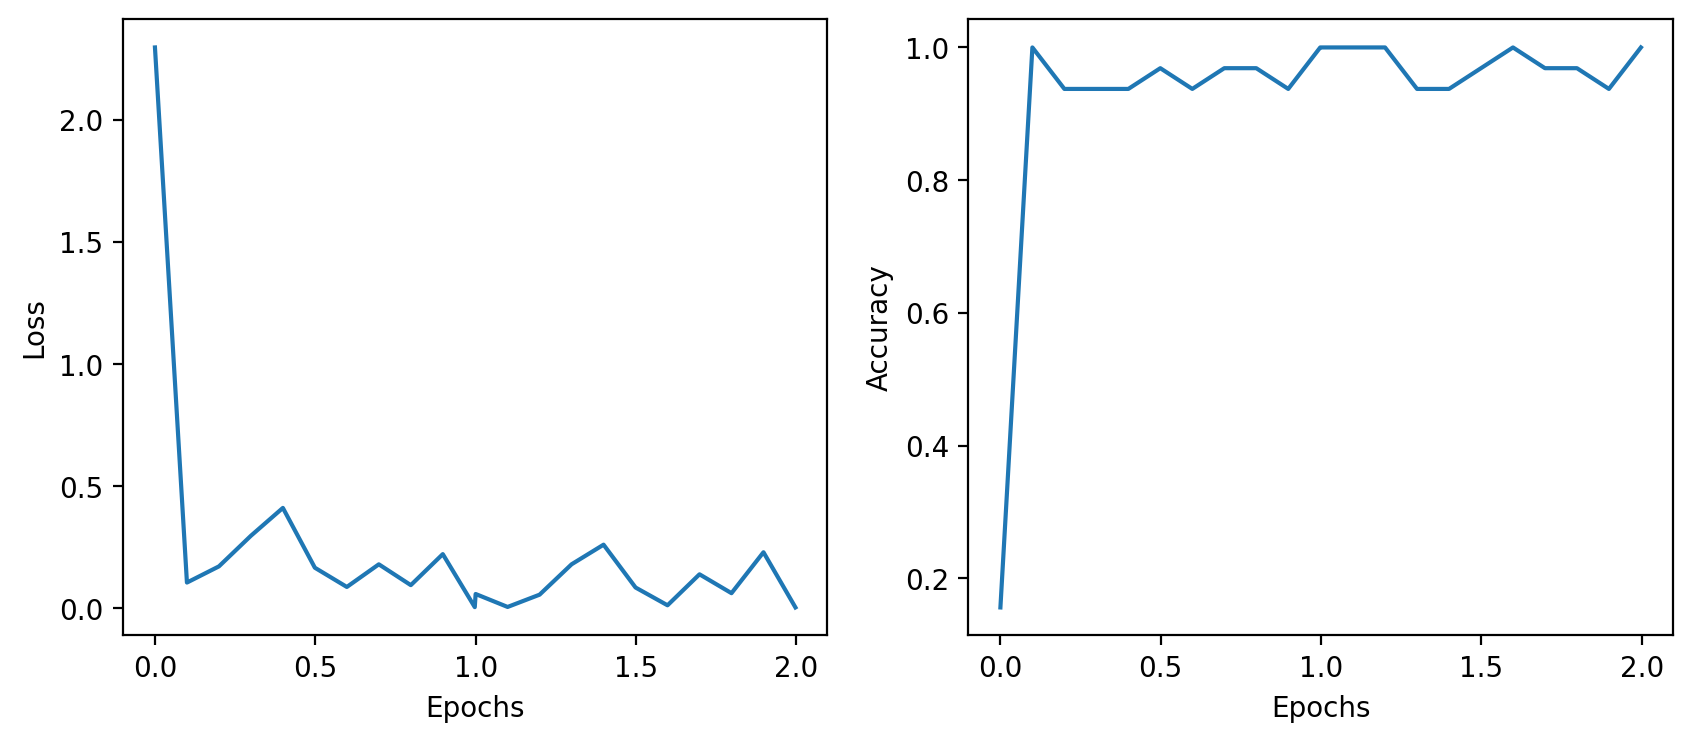

In [27]:
plot_loss_curves(epochs0, losses0, accs0)
plot_loss_curves(epochs1, losses1, accs1)
plot_loss_curves(epochs2, losses2, accs2)
plot_loss_curves(epochs3, losses3, accs3)

In [28]:
test(test_dataloader, model_0)

Model Name: LinearOnlyModel
test loss: 0.310 	 test acc: 0.910


(tensor(0.3097), tensor(0.9103))

In [29]:
test(test_dataloader, model_1)

Model Name: TinyNN
test loss: 0.342 	 test acc: 0.901


(tensor(0.3424), tensor(0.9011))

In [30]:
test(test_dataloader, model_2)

Model Name: TinyNN
test loss: 0.127 	 test acc: 0.961


(tensor(0.1267), tensor(0.9615))

In [31]:
test(test_dataloader, model_3)

Model Name: TinyVGG
test loss: 0.089 	 test acc: 0.973


(tensor(0.0890), tensor(0.9727))

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

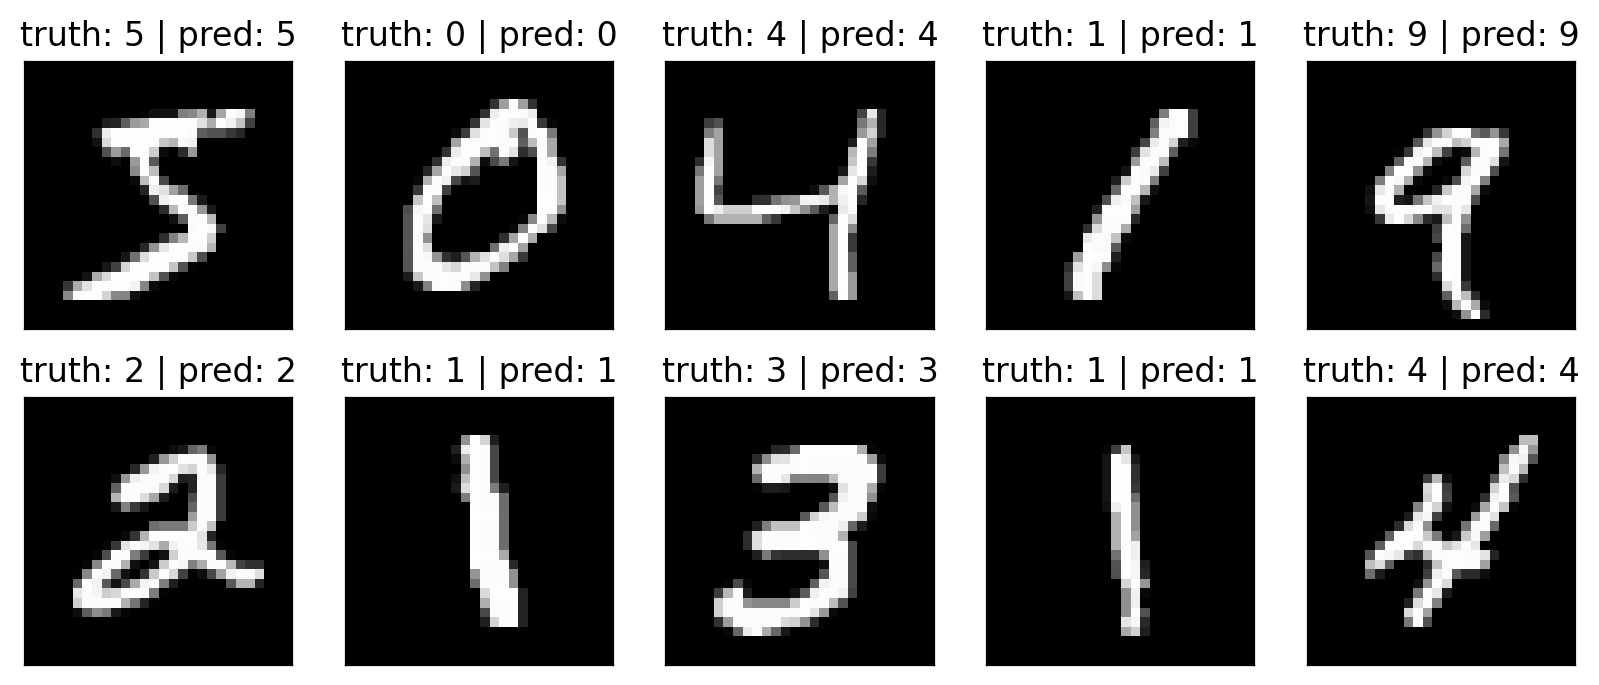

In [34]:
plt.figure(figsize=(10,4))
rows = 2
cols = 5

for i in range(rows*cols):
  plt.subplot(rows, cols,i+1)
  img, label = train_data[i]

  pred = torch.argmax(model_1.model(img.to(device)))
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"truth: {label} | pred: {pred}")

  plt.tick_params(
    axis='both',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelleft=False,
    labelbottom=False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

In [93]:
def make_confusion_matrix(model,
                          dataloader=train_dataloader,
                          device=device
                          ):
  """Creates a confusion matrix for a given model"""
  classes = len(class_names)
  confusion_matrix = torch.zeros(classes, classes, dtype=torch.int)

  model.to(device)
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    preds = torch.argmax(model(X), dim=1)

    for i, j in zip(preds, y):
      confusion_matrix[i, j] += 1

  return confusion_matrix.numpy()

def plot_confusion_matrix_me(confusion_matrix):
  """Plots a confusion matrix using Seaborn's heatmap()"""
  sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

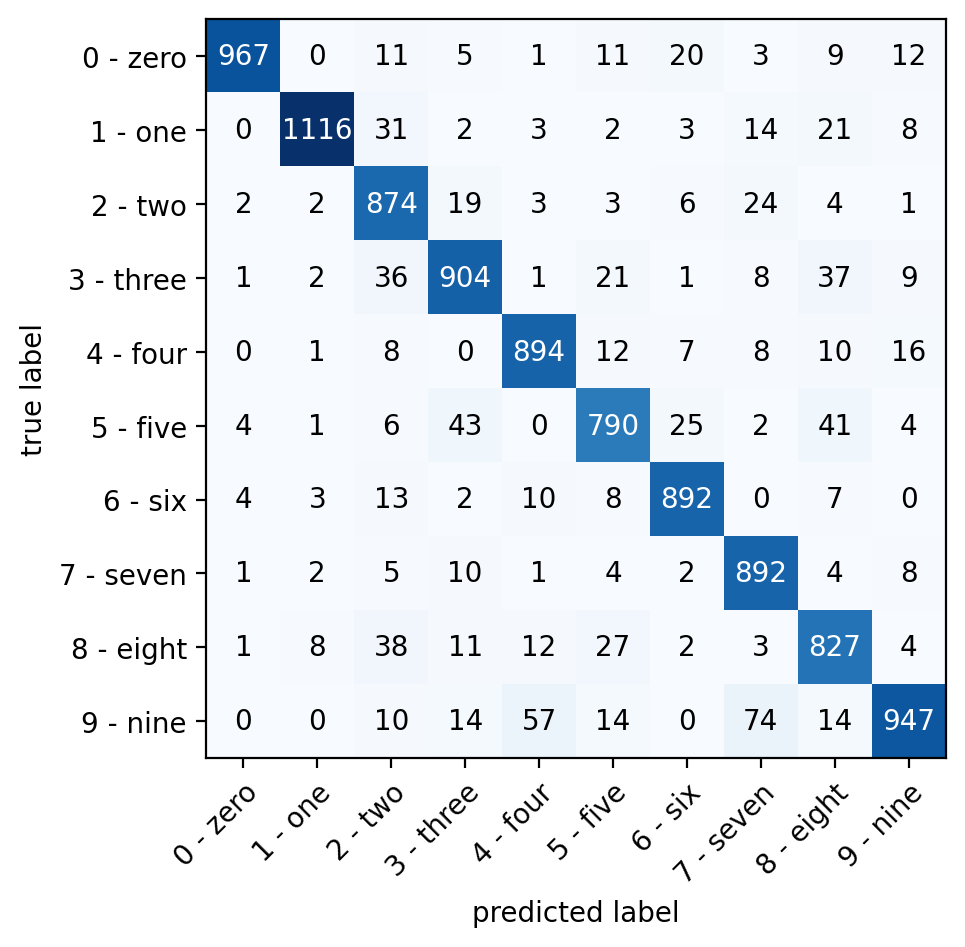

In [94]:
plot_confusion_matrix(make_confusion_matrix(model_0.model), class_names = class_names);

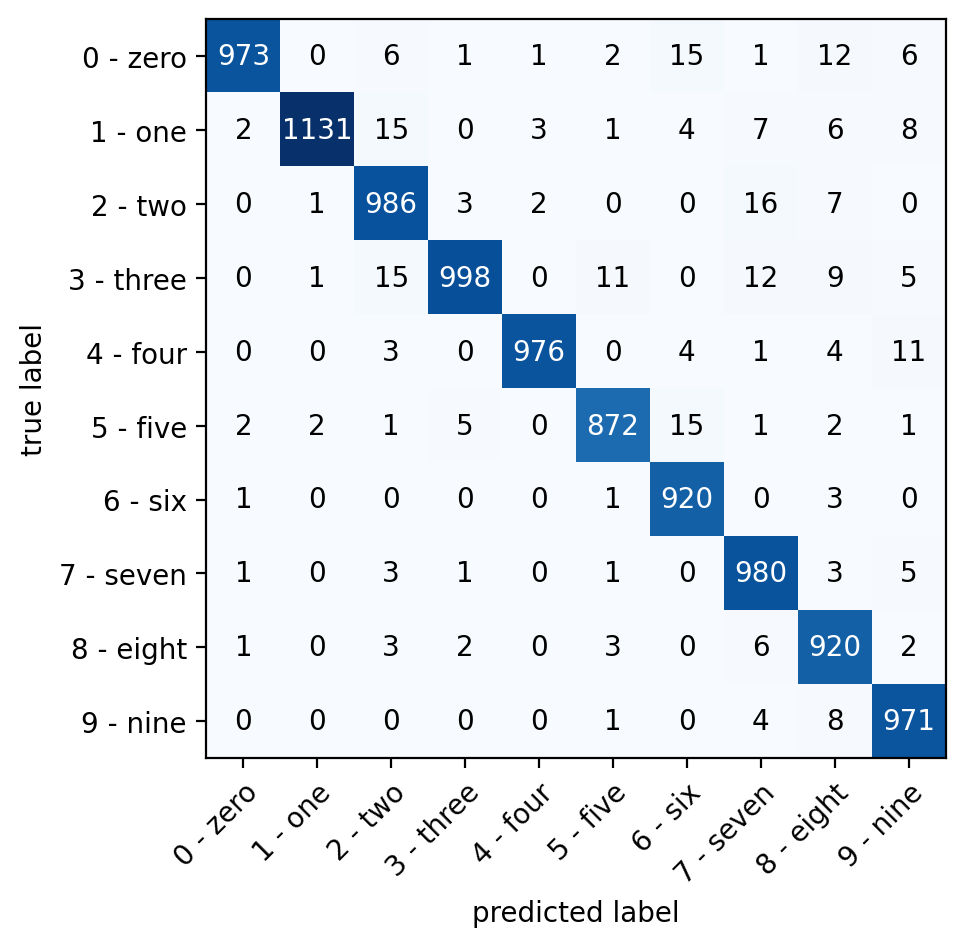

In [95]:
plot_confusion_matrix(make_confusion_matrix(model_3.model), class_names = class_names);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [96]:
train_data = torchvision.datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = torchvision.datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)


# Useful for later
class_names = train_data.classes

100%|██████████| 26421880/26421880 [00:02<00:00, 12646608.66it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203841.00it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3734137.48it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18329606.95it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [100]:
def plot_some(train_data, class_names):
  plt.figure(figsize=(10,4))
  rows = 2
  cols = 5

  for i in range(rows*cols):
    plt.subplot(rows, cols,i+1)
    img, label = train_data[i]
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])

    plt.tick_params(
      axis='both',         # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      left=False,
      right=False,
      labelleft=False,
      labelbottom=False)

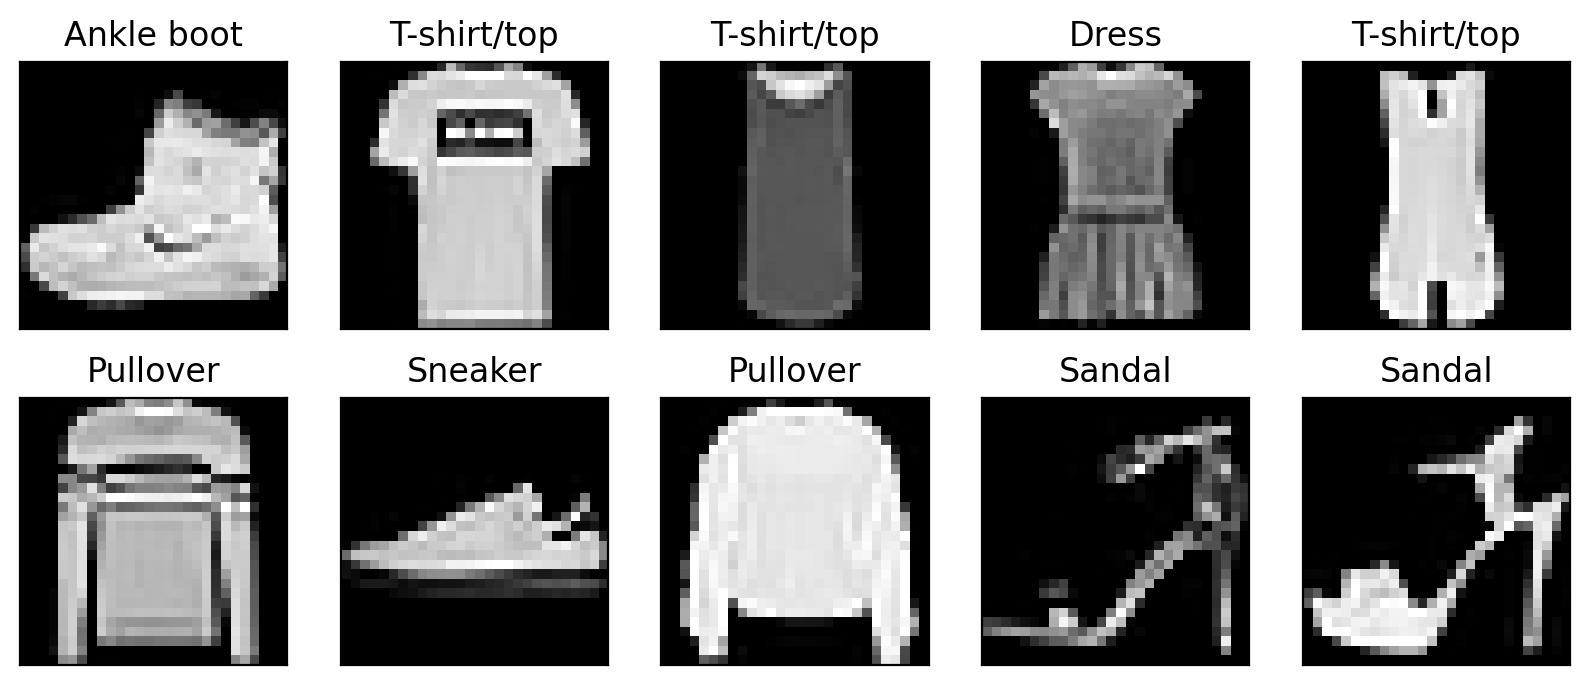

In [101]:
plot_some(train_data, class_names)

In [103]:
batch_size = 32
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size)

In [147]:
fashionmodel_0 = PyTorchClassifier(TinyVGG(28*28, 8, len(class_names)), class_names=class_names)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 2.287 	 acc: 0.156 	 batch: [0 / 1875 ]
training loss: 1.062 	 acc: 0.594 	 batch: [187 / 1875 ]
training loss: 0.808 	 acc: 0.719 	 batch: [374 / 1875 ]
training loss: 0.657 	 acc: 0.781 	 batch: [561 / 1875 ]
training loss: 0.332 	 acc: 0.875 	 batch: [748 / 1875 ]
training loss: 0.335 	 acc: 0.938 	 batch: [935 / 1875 ]
training loss: 0.304 	 acc: 0.906 	 batch: [1122 / 1875 ]
training loss: 0.445 	 acc: 0.844 	 batch: [1309 / 1875 ]
training loss: 0.324 	 acc: 0.875 	 batch: [1496 / 1875 ]
training loss: 0.737 	 acc: 0.781 	 batch: [1683 / 1875 ]
training loss: 0.338 	 acc: 0.938 	 batch: [1870 / 1875 ]
----- Epoch: 0 -----
Model Name: TinyVGG
test loss: 0.466 	 test acc: 0.830
training loss: 0.343 	 acc: 0.844 	 batch: [0 / 1875 ]
training loss: 0.433 	 acc: 0.781 	 batch: [187 / 1875 ]
training loss: 0.456 	 acc: 0.844 	 batch: [374 / 1875 ]
training loss: 0.532 	 acc: 0.812 	 batch: [561 / 1875 ]
training loss: 0.201 	 acc: 0.938 	 batch: [748 / 1875 ]
training lo

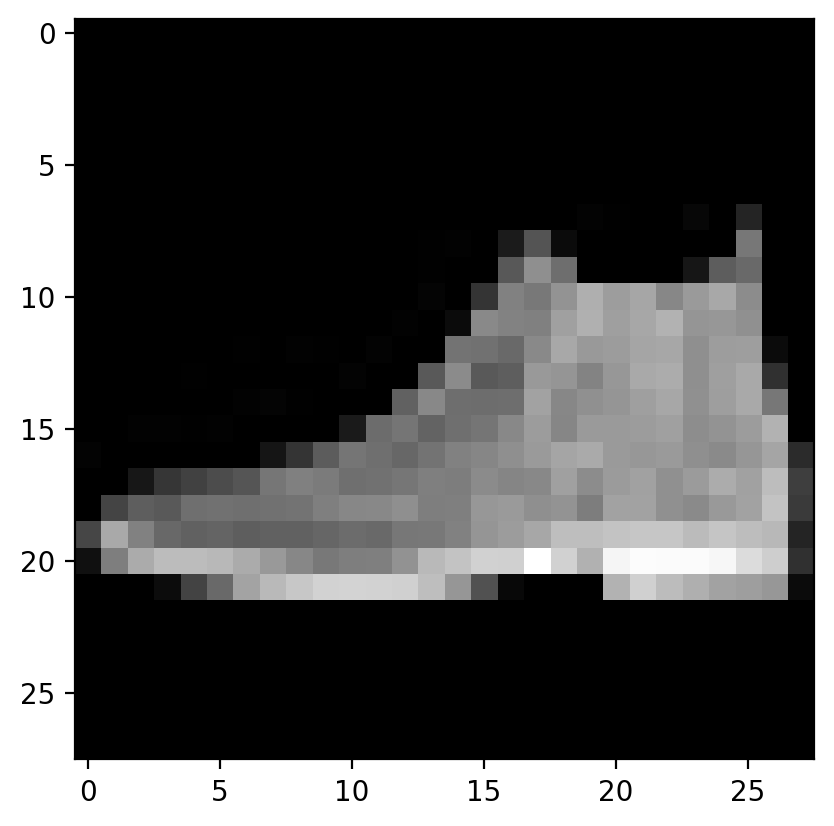

In [148]:
trajectory_0 = train(fashionmodel_0, 2)

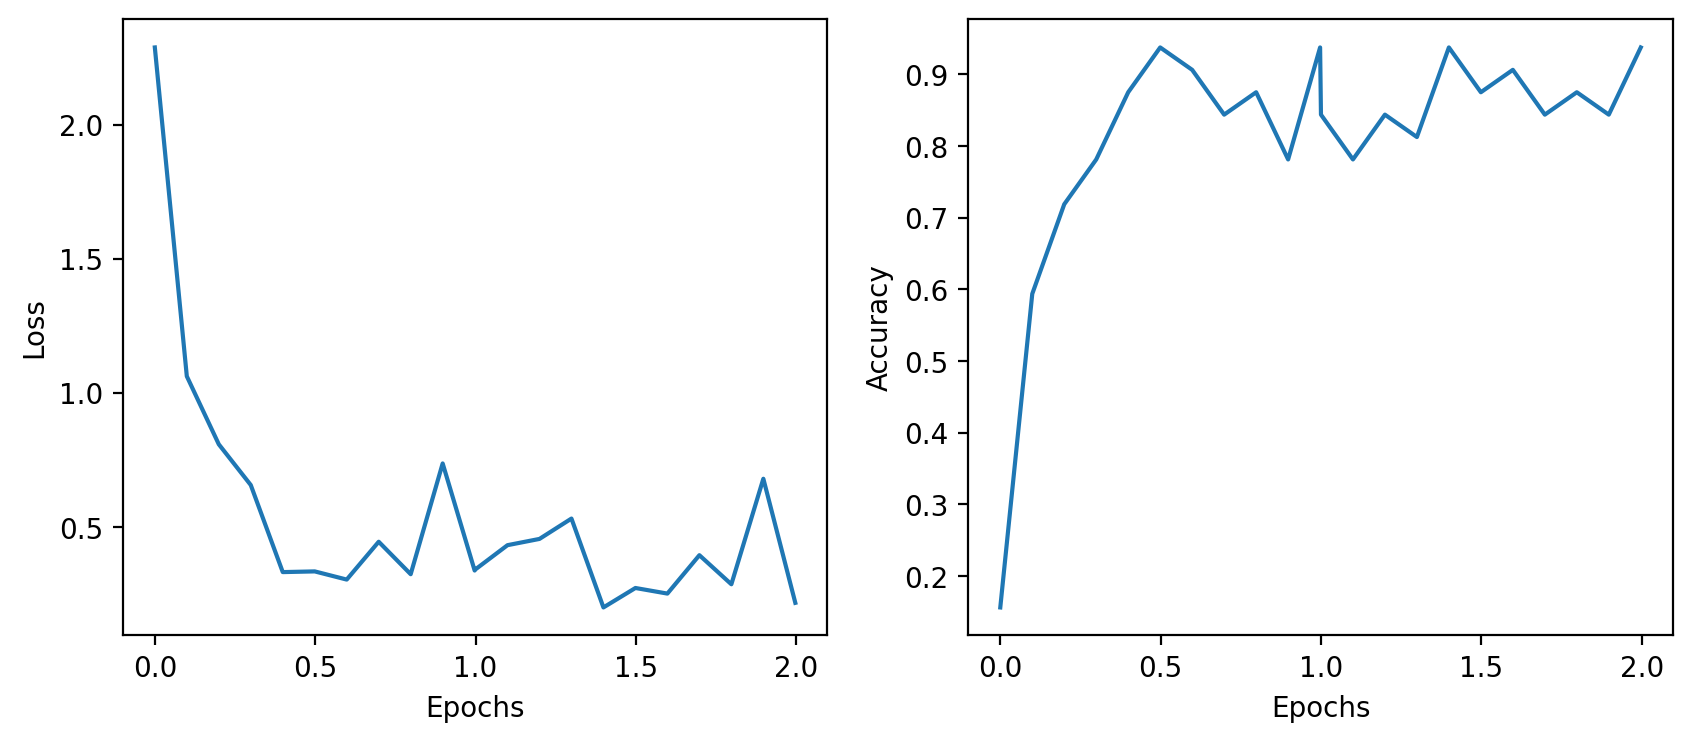

In [149]:
plot_loss_curves(trajectory_0[0], trajectory_0[1], trajectory_0[2])

Model Name: TinyVGG
test loss: 0.414 	 test acc: 0.855


(tensor(0.4141), tensor(0.8552))

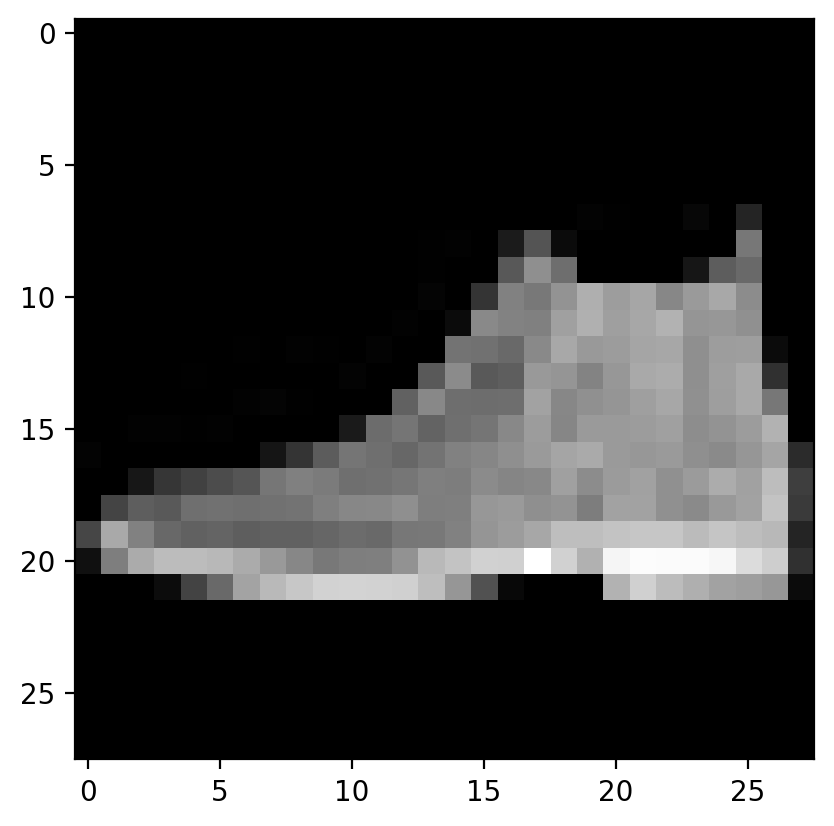

In [174]:
test(test_dataloader, fashionmodel_0)

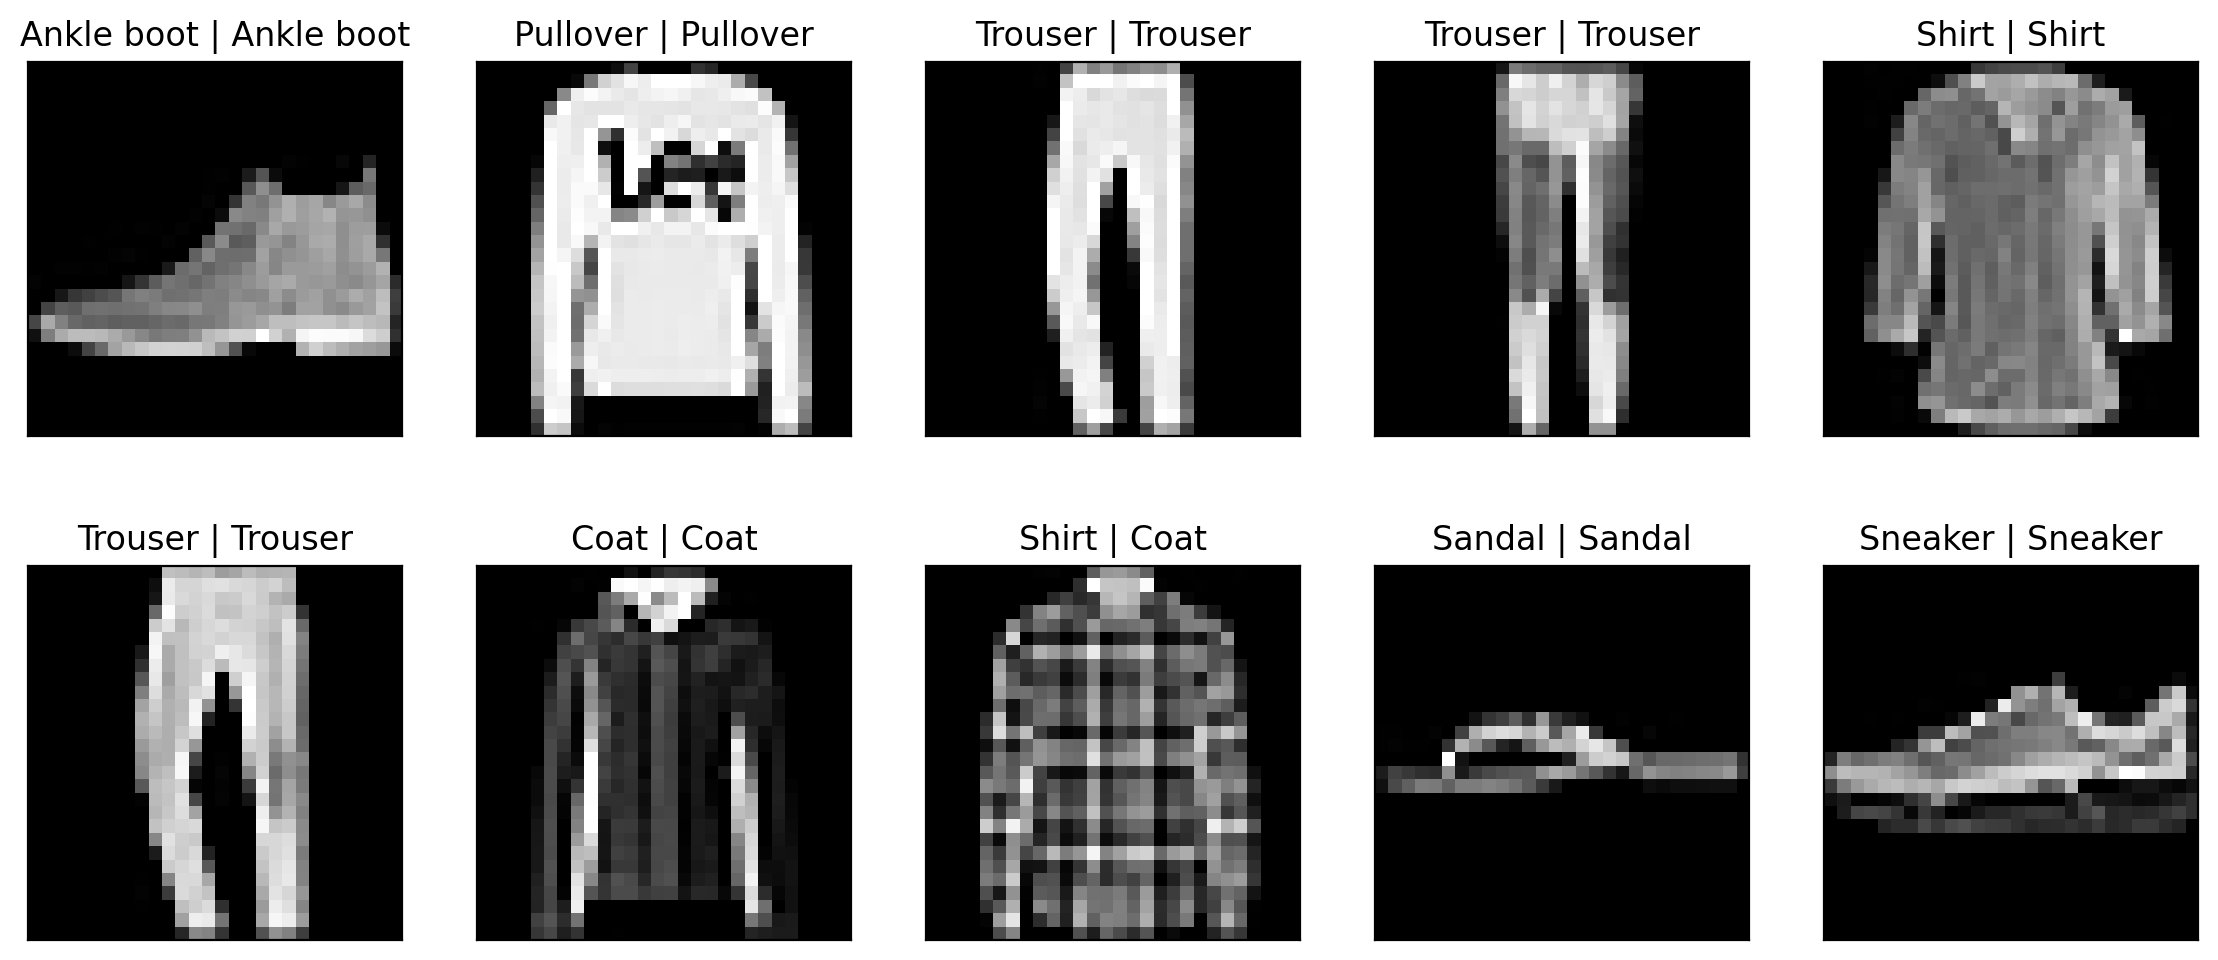

In [179]:
for X, y in test_dataloader:
  logits = fashionmodel_0.model(X)
  preds = torch.argmax(logits, dim=1)

  rows, cols = 2, 5
  plt.figure(figsize=(14,6))

  for i in range(rows*cols):
    plt.subplot(rows, cols,i+1)
    img = X[i]

    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"{class_names[y[i]]} | {class_names[preds[i]]}")

    plt.tick_params(
      axis='both',         # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      left=False,
      right=False,
      labelleft=False,
      labelbottom=False)
  break

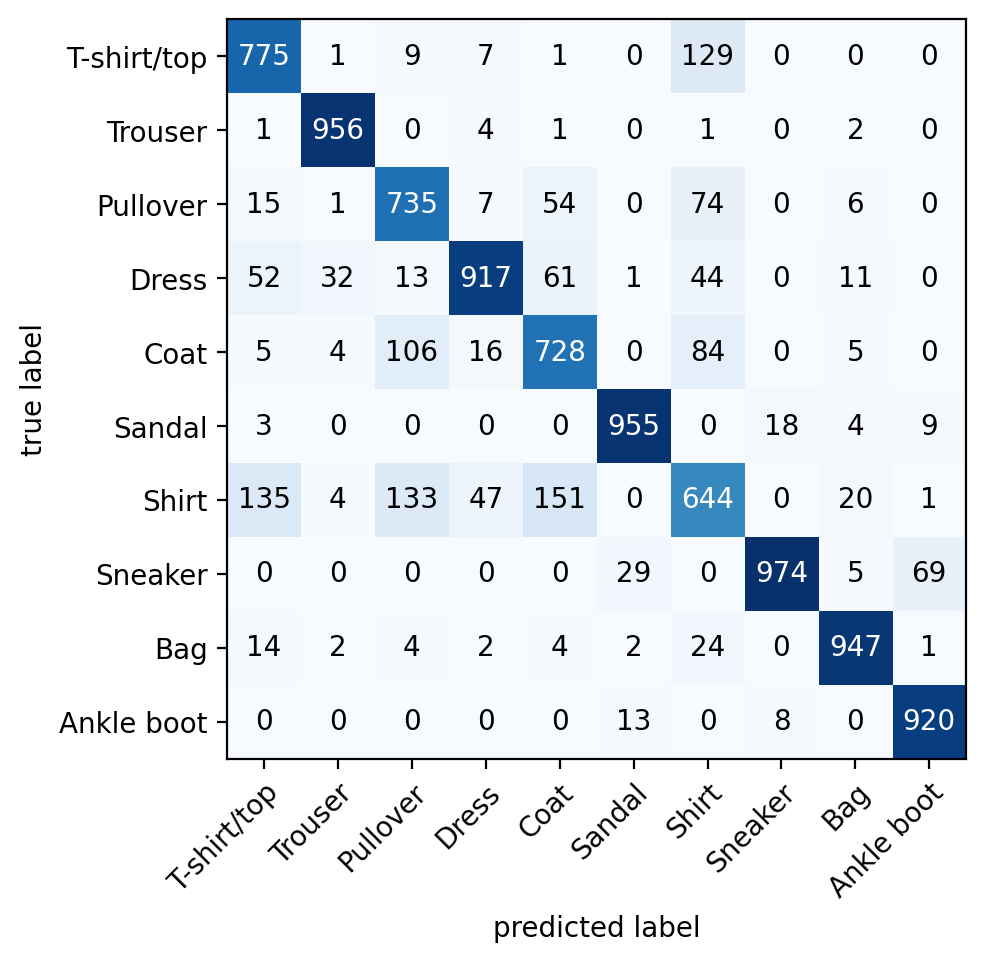

In [180]:
plot_confusion_matrix(make_confusion_matrix(fashionmodel_0.model), class_names = class_names);